# Finding Index of Numbers that Add Up to 16 Using Grover's Algorithm

In [26]:
import qiskit

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from numpy import pi
from matplotlib import pyplot as plt
import numpy as np

import math

### Creating Quantum Register with 9 total qubits

---

$V_{i}$ = Index of Number 

$C_{j}$ = Number in Binary

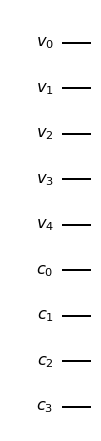

In [27]:
qubits = []

qubits.append(QuantumRegister(5, "v"))
qubits.append(QuantumRegister(4, "c"))

oracle = QuantumCircuit(*qubits)
oracle.draw('mpl')

**Circuit for Arbitrary Counter**

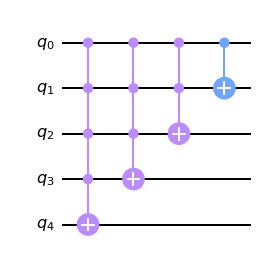

In [33]:
example = QuantumCircuit(5)
li = list(range(4))
for i in range(4):
    example.mct(li, 4 - i)
    li.pop()
example.draw("mpl")

In [19]:
def counter(nqubits):
    qc = QuantumCircuit(nqubits + 1)
    li = list(range(nqubits))
    for i in range(nqubits):
        qc.mct(li, nqubits - i)
        li.pop()
    count = qc.to_gate()
    count.name = "+1"
    return count

In [21]:
"""


"""

numbers = [1, 3, 6, 4, 2]
for i, j in enumerate(numbers):
    l = [i]
    l.extend([5, 6, 7, 8])
    for i in range(j):
        oracle.append(counter(4), l)

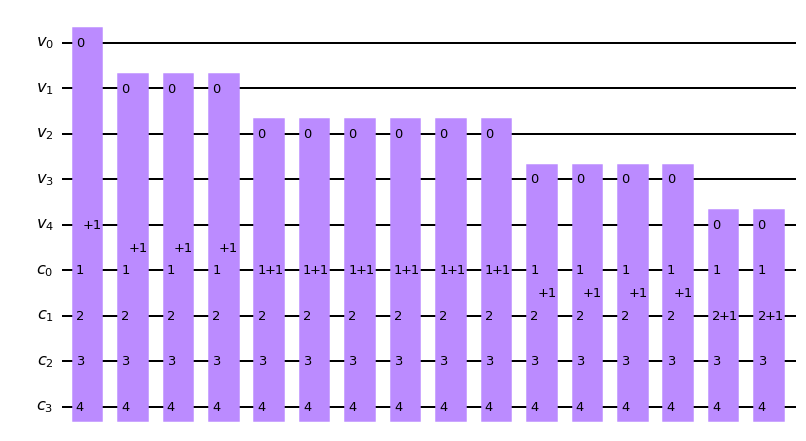

In [22]:
oracle.draw('mpl')

In [146]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [147]:
circuit = QuantumCircuit(QuantumRegister(10),ClassicalRegister(5))
circuit.h(range(5))
circuit.x(9)
circuit.h(9)

for i in range(12):
    circuit.append(oracle,list(range(9)))
    circuit.x([5,8])
    circuit.mct([5,6,7,8],9)
    circuit.x([5,8])
    circuit.append(oracle.inverse(),list(range(9)))
    circuit.append(diffuser(5),list(range(5)))

circuit.measure(list(range(5)),list(range(5)))

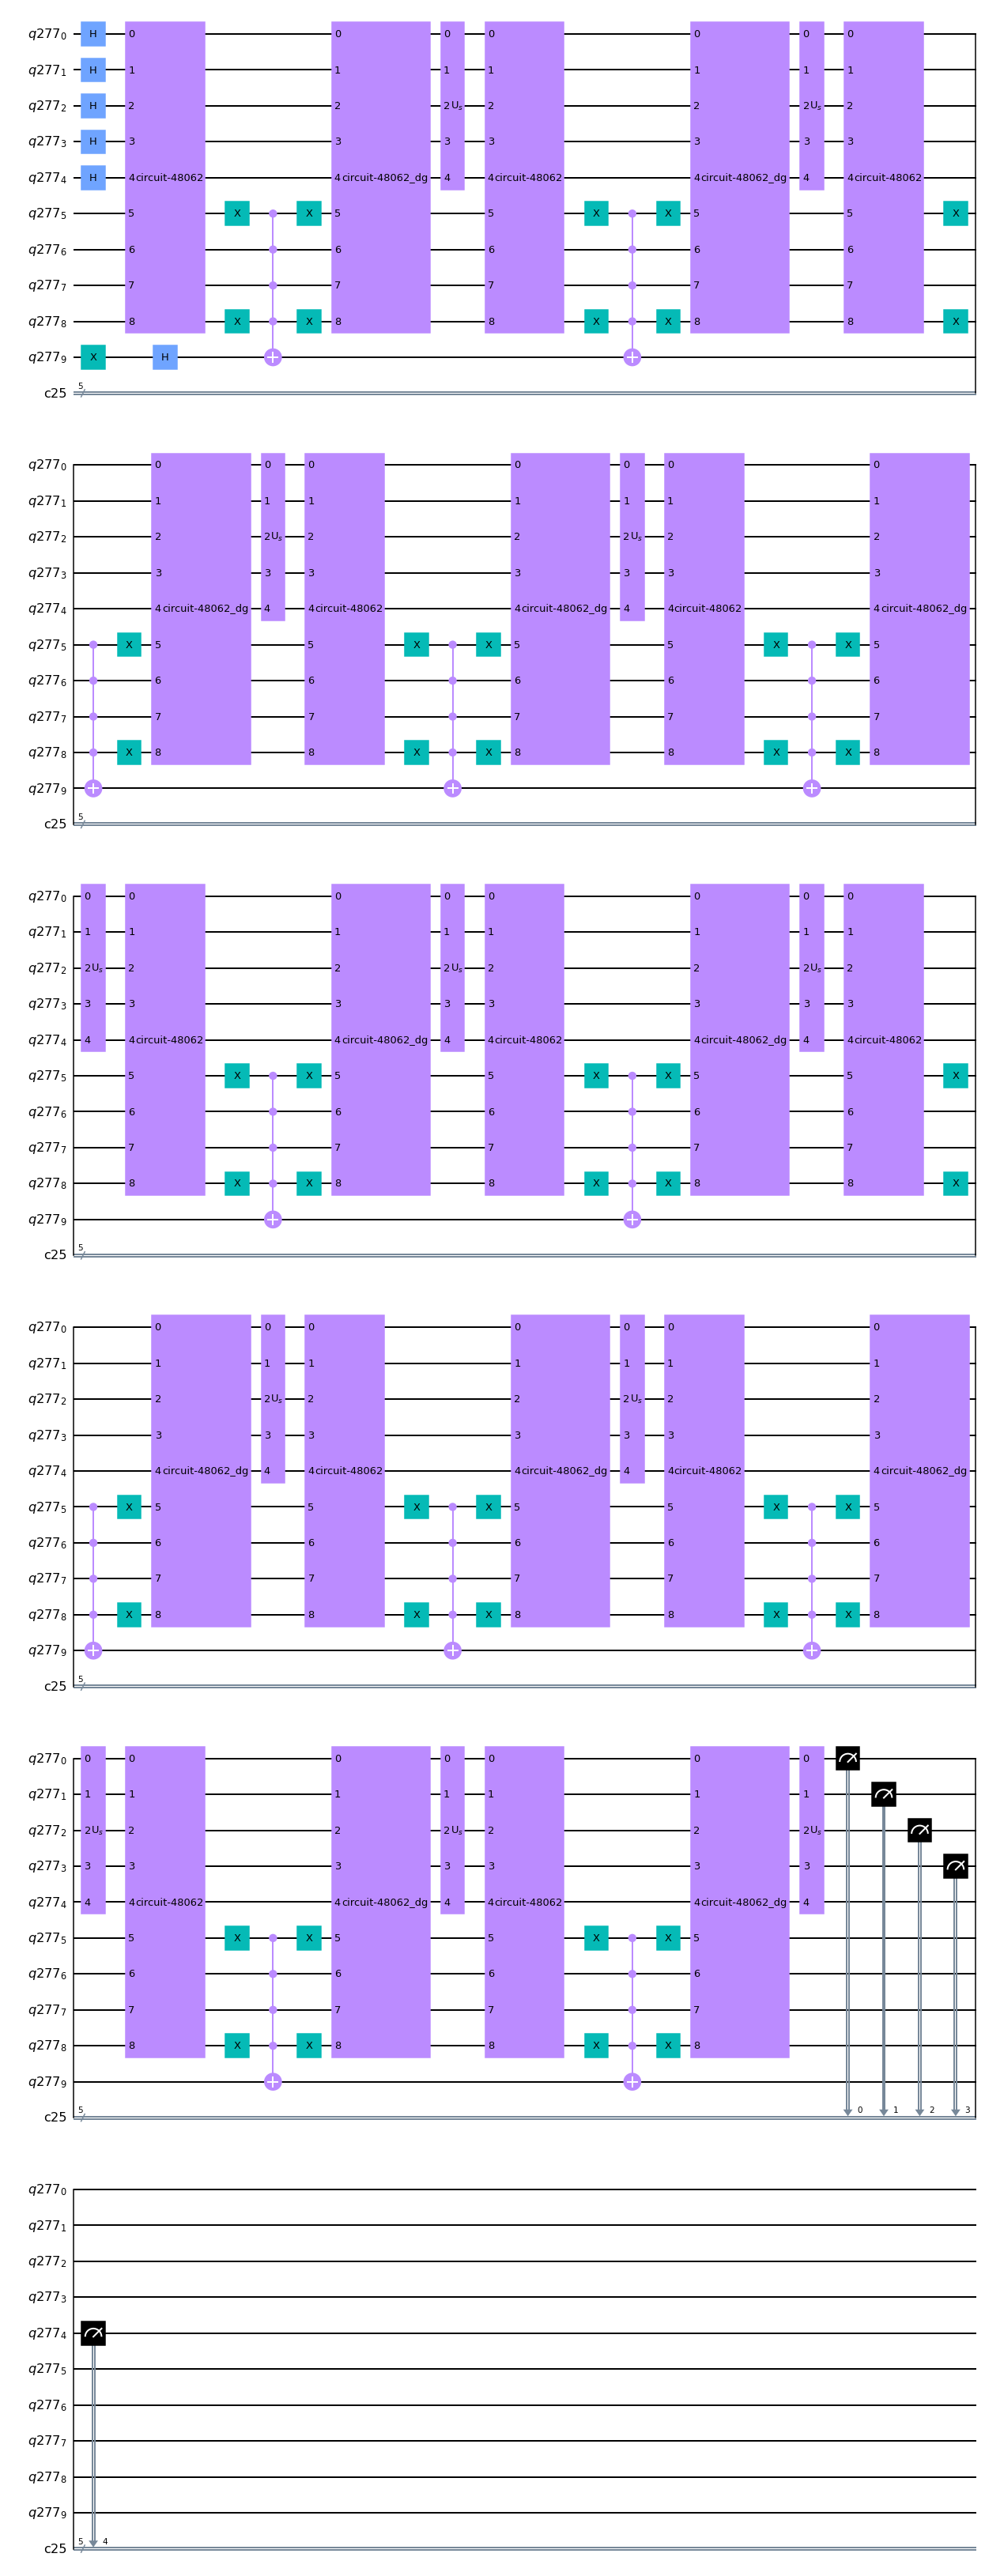

In [148]:
circuit.draw('mpl')

In [149]:
from qiskit import Aer, assemble, transpile
aer_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj,shots=100000).result()
counts = results.get_counts()

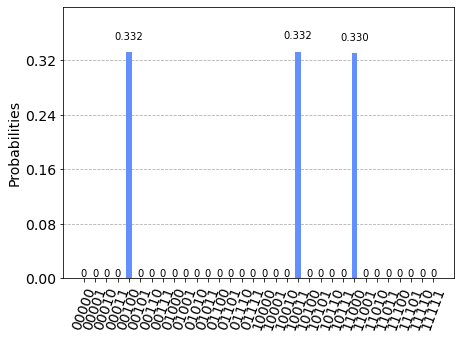

In [150]:
plot_histogram(counts)

In [151]:
counts

{'01000': 10,
 '01011': 12,
 '11110': 22,
 '11010': 13,
 '00001': 18,
 '00010': 18,
 '01100': 17,
 '00111': 13,
 '10100': 23,
 '00011': 19,
 '10001': 18,
 '01001': 19,
 '11011': 15,
 '10101': 27,
 '00101': 20,
 '00000': 21,
 '10011': 33245,
 '01110': 31,
 '11111': 14,
 '10110': 24,
 '10010': 17,
 '01101': 22,
 '10111': 8,
 '11100': 16,
 '01010': 17,
 '01111': 24,
 '00100': 33175,
 '00110': 18,
 '11101': 18,
 '10000': 18,
 '11001': 21,
 '11000': 33047}

In [104]:
1+3+6+4+2

16

In [93]:
2**5

32

In [141]:
0110

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1016057321.py, line 1)